In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
plt.rcParams['svg.fonttype'] = 'none'

In [54]:
#map cog description
arc = pd.read_csv('./data/figure4/1_arc_motif_cog_class_count.tsv',sep='\t',header=None,names=['COG class','Number of archaea smORFs annotated with the COG','Proportion of archaea smORFs annotated with the COG','Number of all archaea smORFs annotated with COGs'])
bac = pd.read_csv('./data/figure4/1_bac_motif_cog_class_count.tsv',sep='\t',header=None,names=['COG class','Number of bacteria smORFs annotated with the COG','Proportion of bacteria smORFs annotated with the COG','Number of all bacteria smORFs annotated with COGs'])
df = arc.merge(bac,on='COG class')
df = df.sort_values('Proportion of bacteria smORFs annotated with the COG',ascending=False)
df

,COG class,Number of archaea smORFs annotated with the COG,Proportion of archaea smORFs annotated with the COG,Number of all archaea smORFs annotated with COGs,Number of bacteria smORFs annotated with the COG,Proportion of bacteria smORFs annotated with the COG,Number of all bacteria smORFs annotated with COGs
0,J,56106,0.276623,202825,995598,0.209722,4747223
5,K,41350,0.203870,202825,824569,0.173695,4747223
1,S,17572,0.086636,202825,500086,0.105343,4747223
6,V,18708,0.092237,202825,423820,0.089277,4747223
11,R,17718,0.087356,202825,310073,0.065317,4747223
4,O,10969,0.054081,202825,261624,0.055111,4747223
9,P,7800,0.038457,202825,218809,0.046092,4747223
3,H,11968,0.059007,202825,212824,0.044831,4747223
2,C,10246,0.050516,202825,203341,0.042834,4747223
17,L,1120,0.005522,202825,182883,0.038524,4747223


In [55]:
df = df[['COG class','Proportion of bacteria smORFs annotated with the COG','Proportion of archaea smORFs annotated with the COG']]
df.columns = ['COG class','Bacteria','Archaea']
df = df.set_index('COG class')

df_stack = df.stack() 
df_stack.index = df_stack.index.rename('Taxonomy',level=1)
df_stack.name = 'Proportion'
df_stack = df_stack.reset_index() 
df_stack

cog = pd.read_csv('./data/figure4/fun-20.tab.txt',usecols=[0,2,3],sep='\t',names=['COG class','Description','Function level'])
df = df_stack.merge(cog,on = 'COG class')
df

,COG class,Taxonomy,Proportion,Description,Function level
0,J,Bacteria,0.209722,"Translation, ribosomal structure and biogenesis",INFORMATION STORAGE AND PROCESSING
1,J,Archaea,0.276623,"Translation, ribosomal structure and biogenesis",INFORMATION STORAGE AND PROCESSING
2,K,Bacteria,0.173695,Transcription,INFORMATION STORAGE AND PROCESSING
3,K,Archaea,0.203870,Transcription,INFORMATION STORAGE AND PROCESSING
4,S,Bacteria,0.105343,Function unknown,POORLY CHARACTERIZED
5,S,Archaea,0.086636,Function unknown,POORLY CHARACTERIZED
6,V,Bacteria,0.089277,Defense mechanisms,CELLULAR PROCESSES AND SIGNALING
7,V,Archaea,0.092237,Defense mechanisms,CELLULAR PROCESSES AND SIGNALING
8,R,Bacteria,0.065317,General function prediction only,POORLY CHARACTERIZED
9,R,Archaea,0.087356,General function prediction only,POORLY CHARACTERIZED


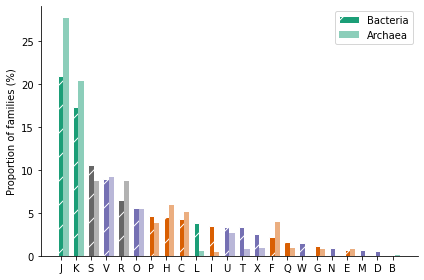

In [56]:
df['Proportion'] = df['Proportion']*100
fig, ax = plt.subplots()
x1 = np.arange(23)
y = df[df['Taxonomy']=='Bacteria']['Proportion'].tolist()
y1 = df[df['Taxonomy']=='Archaea']['Proportion'].tolist()
bar_width = 0.35
ticks = range(23)
tick_label = df[df['Taxonomy']=='Bacteria']['COG class'].tolist()
plt.xticks(ticks, tick_label)

#colors = ['#80cdc1','#80cdc1','#666666','#dfc27d','#666666','#dfc27d','#d95f02','#d95f02','#d95f02','#80cdc1','#d95f02','#dfc27d','#dfc27d','#dfc27d','#d95f02','#d95f02','#dfc27d','#d95f02','#dfc27d','#d95f02','#dfc27d','#dfc27d','#80cdc1']
colors = ['#1b9e77','#1b9e77','#666666','#7570b3','#666666','#7570b3','#d95f02','#d95f02','#d95f02','#1b9e77','#d95f02','#7570b3','#7570b3','#7570b3','#d95f02','#d95f02','#7570b3','#d95f02','#7570b3','#d95f02','#7570b3','#7570b3','#1b9e77']
plt.bar(x1, y,bar_width, color=colors, align='center', label='Bacteria',hatch='/',edgecolor='white')
plt.bar(x1+bar_width, y1,bar_width, color=colors, align='center',label="Archaea",alpha=0.5)  
plt.legend()
ax.set_xlabel('')
ax.set_ylabel('Proportion of families (%)')
plt.tight_layout()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

In [119]:
#phylum
df = pd.read_csv('./data/figure4/trans_phylum.csv')
df.columns=['domain','phylum','transmembrane','number']
df

,domain,phylum,transmembrane,number
0,d__Archaea,p__Aenigmatarchaeota,N,67012
1,d__Archaea,p__Aenigmatarchaeota,Y,12207
2,d__Archaea,p__Altarchaeota,N,18965
3,d__Archaea,p__Altarchaeota,Y,3224
4,d__Archaea,p__Archaea phylum incertae sedis,N,50
...,...,...,...,...
366,d__Bacteria,p__WOR-3,Y,9292
367,d__Bacteria,p__Wallbacteria,N,3825
368,d__Bacteria,p__Wallbacteria,Y,765
369,d__Bacteria,p__Zixibacteria,N,83815


In [120]:
all = df.groupby(['domain','phylum'])['number'].sum()
all = all.reset_index()
all

,domain,phylum,number
0,d__Archaea,p__Aenigmatarchaeota,79219
1,d__Archaea,p__Altarchaeota,22189
2,d__Archaea,p__Archaea phylum incertae sedis,70
3,d__Archaea,p__Asgardarchaeota,138563
4,d__Archaea,p__Candidatus Diapherotrites,1
...,...,...,...
184,d__Bacteria,p__Verrucomicrobiota,7862264
185,d__Bacteria,p__Verrucomicrobiota_A,169314
186,d__Bacteria,p__WOR-3,65413
187,d__Bacteria,p__Wallbacteria,4590


In [121]:
df = df[df['transmembrane']=='Y']
df = df.merge(all,on=['domain','phylum']).drop('transmembrane',axis=1)
df.columns=['domain','phylum','transmembrane','all']
df['fraction'] = df['transmembrane']/df['all']
df

,domain,phylum,transmembrane,all,fraction
0,d__Archaea,p__Aenigmatarchaeota,12207,79219,0.154092
1,d__Archaea,p__Altarchaeota,3224,22189,0.145297
2,d__Archaea,p__Archaea phylum incertae sedis,20,70,0.285714
3,d__Archaea,p__Asgardarchaeota,17710,138563,0.127812
4,d__Archaea,p__Crenarchaeota,328,2167,0.151361
...,...,...,...,...,...
177,d__Bacteria,p__Verrucomicrobiota,985857,7862264,0.125391
178,d__Bacteria,p__Verrucomicrobiota_A,22612,169314,0.133551
179,d__Bacteria,p__WOR-3,9292,65413,0.142051
180,d__Bacteria,p__Wallbacteria,765,4590,0.166667


In [122]:
#add error and var_pct
p = df['transmembrane'] / df['all']
df['MOE'] = np.sqrt(p * (1 - p) / df['all'])
# our confidence level is set to 95%
# then Z=1.96
df['MOE'] = 1.96 * df['MOE']  
df['VAR_pct'] = df['MOE'] * 100 / df['fraction']
df

,domain,phylum,transmembrane,all,fraction,MOE,VAR_pct
0,d__Archaea,p__Aenigmatarchaeota,12207,79219,0.154092,0.002514,1.631598
1,d__Archaea,p__Altarchaeota,3224,22189,0.145297,0.004637,3.191289
2,d__Archaea,p__Archaea phylum incertae sedis,20,70,0.285714,0.105830,37.040518
3,d__Archaea,p__Asgardarchaeota,17710,138563,0.127812,0.001758,1.375472
4,d__Archaea,p__Crenarchaeota,328,2167,0.151361,0.015090,9.969665
...,...,...,...,...,...,...,...
177,d__Bacteria,p__Verrucomicrobiota,985857,7862264,0.125391,0.000231,0.184610
178,d__Bacteria,p__Verrucomicrobiota_A,22612,169314,0.133551,0.001620,1.213272
179,d__Bacteria,p__WOR-3,9292,65413,0.142051,0.002675,1.883355
180,d__Bacteria,p__Wallbacteria,765,4590,0.166667,0.010782,6.468964


In [123]:
# remove  var pct <=10
df = df[df.VAR_pct <= 10]
df['domain'] = df['domain'].str.replace('d__','')
df['fraction'] = df['fraction']*100
df

<ipython-input-123-004f19375597>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['domain'] = df['domain'].str.replace('d__','')
<ipython-input-123-004f19375597>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['fraction'] = df['fraction']*100


,domain,phylum,transmembrane,all,fraction,MOE,VAR_pct
0,Archaea,p__Aenigmatarchaeota,12207,79219,15.409182,0.002514,1.631598
1,Archaea,p__Altarchaeota,3224,22189,14.529722,0.004637,3.191289
3,Archaea,p__Asgardarchaeota,17710,138563,12.781190,0.001758,1.375472
4,Archaea,p__Crenarchaeota,328,2167,15.136133,0.015090,9.969665
5,Archaea,p__EX4484-52,355,1578,22.496831,0.020603,9.158021
...,...,...,...,...,...,...,...
177,Bacteria,p__Verrucomicrobiota,985857,7862264,12.539098,0.000231,0.184610
178,Bacteria,p__Verrucomicrobiota_A,22612,169314,13.355068,0.001620,1.213272
179,Bacteria,p__WOR-3,9292,65413,14.205127,0.002675,1.883355
180,Bacteria,p__Wallbacteria,765,4590,16.666667,0.010782,6.468964


In [125]:
from scipy.stats import spearmanr, mannwhitneyu
bacteria = df[df.domain == 'Bacteria']['fraction'].tolist()
archaea = df[df.domain == 'Archaea']['fraction'].tolist()
stat,p_value=mannwhitneyu(bacteria,archaea)
p_value

0.010288234712933867

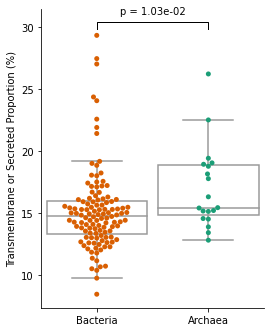

In [15]:
fig = plt.figure(figsize=(4, 5.5))
colors= ['#1b9e77','#d95f02']

sns.set_palette(sns.color_palette(colors))
ax=sns.boxplot(
            data=df,
            x='domain',
            y='fraction',
            showfliers=False,order=['Bacteria','Archaea'],
            color='white',width=0.9)

sns.swarmplot(
              data=df,
              x='domain',
              y='fraction',order=['Bacteria','Archaea'],
              s=5,
              hue='domain' 
              )
x1, x2 = 0, 1
y,h = df["fraction"].mean()+13,.5


plt.plot([x1, x1, x2, x2], [y+1.5, y+h+1.5, y+h+1.5, y+1.5], lw=1, c="k") 

plt.text((x1+x2)*.5, y+h+2, f'p = 1.03e-02', ha='center', va='bottom', color="k")
#ax.tick_params(which='major',direction='in',length=3,width=1.,labelsize=14,bottom=False)

ax.legend_.remove()
#plt.legend(loc=3,bbox_to_anchor=(0,1),ncol=2)
ax.set_xlabel('')
ax.set_ylabel('Transmembrane or Secreted Proportion (%)')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

In [127]:
#remove outliers
from scipy.stats import spearmanr, mannwhitneyu
bacteria = df[df.domain == 'Bacteria']['fraction']
Q1 = bacteria.quantile(0.25)
Q3 = bacteria.quantile(0.75)
IQR = Q3-Q1
down = Q1-(1.5*IQR)
up = Q3+(1.5*IQR)
bacteria = bacteria[(bacteria<up) & (bacteria > down)].tolist()

archaea = df[df.domain == 'Archaea']['fraction']
Q1 = archaea.quantile(0.25)
Q3 = archaea.quantile(0.75)
IQR = Q3-Q1
down = Q1-(1.5*IQR)
up = Q3+(1.5*IQR)
archaea = archaea[(archaea<up) & (archaea > down)].tolist()

stat,p_value=mannwhitneyu(bacteria,archaea)
p_value

0.004081947542592267

In [128]:
bacteria = df[df.domain == 'Bacteria']['fraction']
Q1 = bacteria.quantile(0.25)
Q3 = bacteria.quantile(0.75)
IQR = Q3-Q1
down = Q1-(1.5*IQR)
up = Q3+(1.5*IQR)
bacteria = df[df.domain == 'Bacteria']
bacteria = bacteria[(bacteria.fraction<up)&(bacteria.fraction>down)]

archaea = df[df.domain == 'Archaea']['fraction']
Q1 = archaea.quantile(0.25)
Q3 = archaea.quantile(0.75)
IQR = Q3-Q1
down = Q1-(1.5*IQR)
up = Q3+(1.5*IQR)
archaea = df[df.domain == 'Archaea']
archaea = archaea[(archaea.fraction<up)&(archaea.fraction>down)]

df_remove = pd.concat([bacteria,archaea])
df_remove

,domain,phylum,transmembrane,all,fraction,MOE,VAR_pct
22,Bacteria,p__4572-55,658,4318,15.238536,0.010720,7.034648
23,Bacteria,p__AABM5-125-24,2877,22750,12.646154,0.004319,3.415287
24,Bacteria,p__ARS69,412,2888,14.265928,0.012755,8.940961
25,Bacteria,p__Abyssubacteria,709,6376,11.119824,0.007717,6.939615
27,Bacteria,p__Acidobacteriota,2808234,22241165,12.626290,0.000138,0.109328
...,...,...,...,...,...,...,...
16,Archaea,p__PWEA01,791,4157,19.028145,0.011932,6.270972
17,Archaea,p__QMZS01,531,2737,19.400804,0.014815,7.636145
19,Archaea,p__Thermoplasmatota,229658,1520561,15.103505,0.000569,0.376843
20,Archaea,p__Thermoproteota,277561,1804739,15.379565,0.000526,0.342227


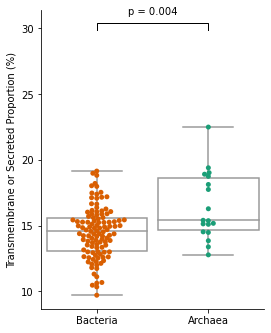

In [129]:
fig = plt.figure(figsize=(4, 5.5))
colors= ['#d95f02','#1b9e77']

sns.set_palette(sns.color_palette(colors))
ax=sns.boxplot(
            data=df_remove,
            x='domain',
            y='fraction',
            showfliers=False,order=['Bacteria','Archaea'],
            color='white',width=0.9)

sns.swarmplot(
              data=df_remove,
              x='domain',
              y='fraction',order=['Bacteria','Archaea'],
              s=5,
              hue='domain' 
              )
x1, x2 = 0, 1
y,h = df["fraction"].mean()+13,.5


plt.plot([x1, x1, x2, x2], [y+1.5, y+h+1.5, y+h+1.5, y+1.5], lw=1, c="k") 

plt.text((x1+x2)*.5, y+h+2, f'p = 0.004', ha='center', va='bottom', color="k")
#ax.tick_params(which='major',direction='in',length=3,width=1.,labelsize=14,bottom=False)

ax.legend_.remove()
#plt.legend(loc=3,bbox_to_anchor=(0,1),ncol=2)
ax.set_xlabel('')
ax.set_ylabel('Transmembrane or Secreted Proportion (%)')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

In [2]:
df = pd.read_csv('./data/figure4/2_arc_motif_cog_class_count_trans.tsv',sep='\t')
df['arc_trans_proportion'] = df['arc_trans_count']/df['arc_trans_all']
df['arc_not_trans_proportion'] = df['arc_not_trans_count']/df['arc_not_trans_all']
df['arc_trans_fold_change'] = df['arc_trans_proportion']/df ['arc_not_trans_proportion']
df
#df.to_csv('./data/figure4/3_arc_cog_class_count_trans_fc.tsv',sep='\t',index=None)

,cog,arc_trans_count,arc_trans_all,arc_not_trans_count,arc_not_trans_all,arc_trans_proportion,arc_not_trans_proportion,arc_trans_fold_change
0,C,1181,11347,9065,191478,0.104080,0.047342,2.198467
1,G,1376,11347,159,191478,0.121266,0.000830,146.035734
2,U,3769,11347,1649,191478,0.332158,0.008612,38.569438
3,R,1285,11347,16433,191478,0.113246,0.085822,1.319545
4,P,907,11347,6893,191478,0.079933,0.035999,2.220429
5,H,461,11347,11507,191478,0.040627,0.060096,0.676047
6,K,747,11347,40603,191478,0.065832,0.212050,0.310456
7,T,569,11347,1046,191478,0.050145,0.005463,9.179487
8,O,31,11347,10938,191478,0.002732,0.057124,0.047826
9,S,1393,11347,16179,191478,0.122764,0.084495,1.452905


In [91]:
# calculate pvalue
from scipy.stats import fisher_exact
from scipy.stats import chi2_contingency

def cal(infile,outfile):
    out = open(outfile,'wt')
    with open(infile,'rt') as f:
        for line in f:
            if line.startswith('cog'):
                out.write(f'{line.strip()}\tarc_p_fisher\tarc_p_chi2\n')
            else:
                cog,arc_trans_count,arc_trans_all,arc_not_trans_count,arc_not_trans_all,arc_trans_proportion,arc_not_trans_proportion,arc_trans_fold_change, = line.strip().split('\t')
                arc_trans_count = int(arc_trans_count)
                arc_not_trans_count = int(arc_not_trans_count)
                arc_trans_no = int(arc_trans_all)-arc_trans_count
                arc_not_trans_no = int(arc_not_trans_all)-arc_not_trans_count
                
                res_fisher = fisher_exact([[arc_trans_count,arc_not_trans_count], [arc_trans_no, arc_not_trans_no]])
                res_chi2 = chi2_contingency([[arc_trans_count,arc_not_trans_count], [arc_trans_no, arc_not_trans_no]])
                out.write(f'{line.strip()}\t{res_fisher.pvalue}\t{res_chi2.pvalue}\n')
    out.close()


infile = './data/figure4/3_arc_cog_class_count_trans.tsv'
outfile = './data/figure4/4_arc_cog_class_p_trans.tsv'
cal(infile,outfile)

In [17]:
# p adjust (bonferroni)
from statsmodels.stats.multitest import multipletests
result = pd.read_csv('./data/figure4/4_arc_cog_class_p_trans.tsv',sep='\t')
rejected, p_adjusted, _, alpha_corrected = multipletests(result['arc_p_fisher'], method='bonferroni')
result['p_adjusted_fisher'] = p_adjusted
rejected, p_adjusted, _, alpha_corrected = multipletests(result['arc_p_chi2'], method='bonferroni')
result['p_adjusted_chi2'] = p_adjusted

func = pd.read_csv('./data/figure4/fun-20.tab.txt',usecols=[0,2,3],sep='\t',names=['cog','description','process'])
merged_func = result.merge(func,'left',on='cog')
merged_func
#merged_func.to_csv('./data/figure4/5_arc_cog_class_p_adjust_func.tsv',sep='\t',index=None)

,cog,arc_trans_count,arc_trans_all,arc_not_trans_count,arc_not_trans_all,arc_trans_proportion,arc_not_trans_proportion,arc_trans_fold_change,arc_p_fisher,arc_p_chi2,p_adjusted_fisher,p_adjusted_chi2,description,process
0,C,1181,11347,9065,191478,0.104080,0.047342,2.198467,1.422721e-125,4.061955e-158,3.272259e-124,9.342496e-157,Energy production and conversion,METABOLISM
1,G,1376,11347,159,191478,0.121266,0.000830,146.035734,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,Carbohydrate transport and metabolism,METABOLISM
2,U,3769,11347,1649,191478,0.332158,0.008612,38.569438,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,"Intracellular trafficking, secretion, and vesi...",CELLULAR PROCESSES AND SIGNALING
3,R,1285,11347,16433,191478,0.113246,0.085822,1.319545,3.537514e-22,1.066012e-23,8.136283e-21,2.451829e-22,General function prediction only,POORLY CHARACTERIZED
4,P,907,11347,6893,191478,0.079933,0.035999,2.220429,1.916254e-97,2.314877e-123,4.407385e-96,5.324217e-122,Inorganic ion transport and metabolism,METABOLISM
5,H,461,11347,11507,191478,0.040627,0.060096,0.676047,2.739933e-19,1.456014e-17,6.301847e-18,3.348831e-16,Coenzyme transport and metabolism,METABOLISM
6,K,747,11347,40603,191478,0.065832,0.212050,0.310456,0.000000e+00,1.308182e-308,0.000000e+00,3.008819e-307,Transcription,INFORMATION STORAGE AND PROCESSING
7,T,569,11347,1046,191478,0.050145,0.005463,9.179487,1.155189e-290,0.000000e+00,2.656935e-289,0.000000e+00,Signal transduction mechanisms,CELLULAR PROCESSES AND SIGNALING
8,O,31,11347,10938,191478,0.002732,0.057124,0.047826,1.389153e-228,1.625465e-136,3.195051e-227,3.738570e-135,"Posttranslational modification, protein turnov...",CELLULAR PROCESSES AND SIGNALING
9,S,1393,11347,16179,191478,0.122764,0.084495,1.452905,8.720850e-41,6.412293e-45,2.005796e-39,1.474827e-43,Function unknown,POORLY CHARACTERIZED


Text(0, 0.5, '')

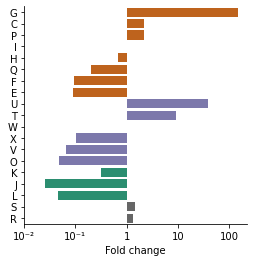

In [19]:
import numpy as np

df = merged_func[merged_func['p_adjusted_fisher']<0.05]
df = df[df['p_adjusted_chi2']<0.05]
df['log(fold change)'] = df["arc_trans_fold_change"].apply(np.log10)
corder = ['G','C','P','I','H','Q','F','E','U','T','W','X','V','O','K','J','L','S','R']
fig, ax = plt.subplots(figsize=(4,4))
colors=['#d95f02','#d95f02','#d95f02','#d95f02','#d95f02','#d95f02','#d95f02','#d95f02','#dfc27d','#dfc27d','#dfc27d','#dfc27d','#dfc27d','#dfc27d','#80cdc1','#80cdc1','#80cdc1','#666666','#666666']
colors=['#d95f02','#d95f02','#d95f02','#d95f02','#d95f02','#d95f02','#d95f02','#d95f02','#7570b3','#7570b3','#7570b3','#7570b3','#7570b3','#7570b3','#1b9e77','#1b9e77','#1b9e77','#666666','#666666']
sns.barplot(data=df, x='log(fold change)', y="cog",order=corder,palette=sns.color_palette(colors))

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.xticks([-2,-1,0,1,2],['10⁻²','10⁻¹','1','10','100'])
ax.set_xlabel('Fold change')
ax.set_ylabel('')

In [20]:
df = pd.read_csv(r'./data/figure4/2_bac_motif_cog_class_count_trans.tsv',sep='\t')
df['bac_trans_proportion'] = df['bac_trans_count']/df['bac_trans_all']
df['bac_not_trans_proportion'] = df['bac_not_trans_count']/df['bac_not_trans_all']
df['bac_trans_fold_change'] = df['bac_trans_proportion']/df ['bac_not_trans_proportion']
df
#df.to_csv(r'./data/figure4/2_bac_cog_class_count_trans.tsv',sep='\t',index=None)

,cog,bac_trans_count,bac_trans_all,bac_not_trans_count,bac_not_trans_all,bac_trans_proportion,bac_not_trans_proportion,bac_trans_fold_change
0,C,54422,455576,148919,4291647,0.119458,0.034700,3.442608
1,U,142207,455576,19267,4291647,0.312148,0.004489,69.529648
2,P,26065,455576,192744,4291647,0.057213,0.044911,1.273914
3,O,27991,455576,233633,4291647,0.061441,0.054439,1.128619
4,Q,415,455576,75673,4291647,0.000911,0.017633,0.051662
5,S,82003,455576,418083,4291647,0.179999,0.097418,1.847695
6,G,14146,455576,38494,4291647,0.031051,0.008970,3.461814
7,R,54474,455576,255599,4291647,0.119572,0.059557,2.007674
8,N,24805,455576,16845,4291647,0.054448,0.003925,13.871754
9,K,24379,455576,800190,4291647,0.053512,0.186453,0.287003


In [98]:
# calculate pvalue
from scipy.stats import fisher_exact
from scipy.stats import chi2_contingency

def cal(infile,outfile):
    out = open(outfile,'wt')
    with open(infile,'rt') as f:
        for line in f:
            if line.startswith('cog'):
                out.write(f'{line.strip()}\tarc_p_fisher\tarc_p_chi2\n')
            else:
                cog,arc_trans_count,arc_trans_all,arc_not_trans_count,arc_not_trans_all,arc_trans_proportion,arc_not_trans_proportion,arc_trans_fold_change, = line.strip().split('\t')
                arc_trans_count = int(arc_trans_count)
                arc_not_trans_count = int(arc_not_trans_count)
                arc_trans_no = int(arc_trans_all)-arc_trans_count
                arc_not_trans_no = int(arc_not_trans_all)-arc_not_trans_count
                
                res_fisher = fisher_exact([[arc_trans_count,arc_not_trans_count], [arc_trans_no, arc_not_trans_no]])
                res_chi2 = chi2_contingency([[arc_trans_count,arc_not_trans_count], [arc_trans_no, arc_not_trans_no]])
                out.write(f'{line.strip()}\t{res_fisher.pvalue}\t{res_chi2.pvalue}\n')
    out.close()


infile = './data/figure4/3_bac_cog_class_count_trans.tsv'
outfile = './data/figure4/4_bac_cog_class_p_trans.tsv'
cal(infile,outfile)

In [21]:
# p adjust (bonferroni)
from statsmodels.stats.multitest import multipletests
result = pd.read_csv(r'./data/figure4/5_bac_cog_class_p_trans.tsv',sep='\t')
rejected, p_adjusted, _, alpha_corrected = multipletests(result['arc_p_fisher'], method='bonferroni')
result['p_adjusted_fisher'] = p_adjusted
rejected, p_adjusted, _, alpha_corrected = multipletests(result['arc_p_chi2'], method='bonferroni')
result['p_adjusted_chi2'] = p_adjusted

func = pd.read_csv('./data/figure4/fun-20.tab.txt',usecols=[0,2,3],sep='\t',names=['cog','description','process'])
merged_func = result.merge(func,'left',on='cog')
merged_func
#merged_func.to_csv('./data/figure4/5_bac_cog_class_p_adjust_func.tsv',sep='\t',index=None)

,cog,bac_trans_count,bac_trans_all,bac_not_trans_count,bac_not_trans_all,bac_trans_proportion,bac_not_trans_proportion,bac_trans_fold_change,arc_p_fisher,arc_p_chi2,p_adjusted_fisher,p_adjusted_chi2,description,process
0,C,54422,455576,148919,4291647,0.119458,0.034700,3.442608,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,Energy production and conversion,METABOLISM
1,U,142207,455576,19267,4291647,0.312148,0.004489,69.529648,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,"Intracellular trafficking, secretion, and vesi...",CELLULAR PROCESSES AND SIGNALING
2,P,26065,455576,192744,4291647,0.057213,0.044911,1.273914,2.090418e-291,3.615430e-310,4.807962e-290,8.315489e-309,Inorganic ion transport and metabolism,METABOLISM
3,O,27991,455576,233633,4291647,0.061441,0.054439,1.128619,9.155809e-84,2.728109e-86,2.105836e-82,6.274651e-85,"Posttranslational modification, protein turnov...",CELLULAR PROCESSES AND SIGNALING
4,Q,415,455576,75673,4291647,0.000911,0.017633,0.051662,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,"Secondary metabolites biosynthesis, transport ...",METABOLISM
5,S,82003,455576,418083,4291647,0.179999,0.097418,1.847695,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,Function unknown,POORLY CHARACTERIZED
6,G,14146,455576,38494,4291647,0.031051,0.008970,3.461814,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,Carbohydrate transport and metabolism,METABOLISM
7,R,54474,455576,255599,4291647,0.119572,0.059557,2.007674,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,General function prediction only,POORLY CHARACTERIZED
8,N,24805,455576,16845,4291647,0.054448,0.003925,13.871754,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,Cell motility,CELLULAR PROCESSES AND SIGNALING
9,K,24379,455576,800190,4291647,0.053512,0.186453,0.287003,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,Transcription,INFORMATION STORAGE AND PROCESSING


Text(0, 0.5, '')

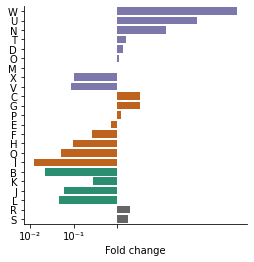

In [23]:
import numpy as np

df = merged_func[merged_func['p_adjusted_fisher']<0.05]
df = df[df['p_adjusted_chi2']<0.05]
df['log(fold change)'] = df["bac_trans_fold_change"].apply(np.log10)
corder = ['W','U','N','T','D','O','M','X','V','C','G','P','E','F','H','Q','I','B','K','J','L','R','S']
fig, ax = plt.subplots(figsize=(4,4))
#colors=['#dfc27d','#dfc27d','#dfc27d','#dfc27d','#dfc27d','#dfc27d','#dfc27d','#dfc27d','#dfc27d','#d95f02','#d95f02','#d95f02','#d95f02','#d95f02','#d95f02','#d95f02','#d95f02','#1b9e77','#1b9e77','#1b9e77','#1b9e77','#666666','#666666']
colors=['#7570b3','#7570b3','#7570b3','#7570b3','#7570b3','#7570b3','#7570b3','#7570b3','#7570b3','#d95f02','#d95f02','#d95f02','#d95f02','#d95f02','#d95f02','#d95f02','#d95f02','#1b9e77','#1b9e77','#1b9e77','#1b9e77','#666666','#666666']
sns.barplot(data=df, x='log(fold change)', y="cog",order=corder,palette=sns.color_palette(colors))
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.xticks([-2,-1,0],['10⁻²','10⁻¹',''])
ax.set_xlabel('Fold change')
ax.set_ylabel('')

In [24]:
arc = pd.read_csv('./data/figure4/2_arc_motif_cog_class_count_trans.tsv',sep='\t')
arc

,cog,arc_trans_count,arc_trans_all,arc_not_trans_count,arc_not_trans_all
0,C,1181,11347,9065,191478
1,G,1376,11347,159,191478
2,U,3769,11347,1649,191478
3,R,1285,11347,16433,191478
4,P,907,11347,6893,191478
5,H,461,11347,11507,191478
6,K,747,11347,40603,191478
7,T,569,11347,1046,191478
8,O,31,11347,10938,191478
9,S,1393,11347,16179,191478


In [25]:
bac = pd.read_csv('./data/figure4/2_bac_motif_cog_class_count_trans.tsv',sep='\t')
bac

,cog,bac_trans_count,bac_trans_all,bac_not_trans_count,bac_not_trans_all
0,C,54422,455576,148919,4291647
1,U,142207,455576,19267,4291647
2,P,26065,455576,192744,4291647
3,O,27991,455576,233633,4291647
4,Q,415,455576,75673,4291647
5,S,82003,455576,418083,4291647
6,G,14146,455576,38494,4291647
7,R,54474,455576,255599,4291647
8,N,24805,455576,16845,4291647
9,K,24379,455576,800190,4291647


In [26]:
df = arc.merge(bac,on='cog')
df['arc_trans_proportion'] = df['arc_trans_count']/df['arc_trans_all']
df['bac_trans_proportion'] = df['bac_trans_count']/df['bac_trans_all']
df['fold change'] = df['arc_trans_proportion']/df['bac_trans_proportion']
df
#df.to_csv('./data/figure4/6_arc_bac_motif_cog_class_count_trans.tsv',sep='\t',index=None)

,cog,arc_trans_count,arc_trans_all,arc_not_trans_count,arc_not_trans_all,bac_trans_count,bac_trans_all,bac_not_trans_count,bac_not_trans_all,arc_trans_proportion,bac_trans_proportion,fold change
0,C,1181,11347,9065,191478,54422,455576,148919,4291647,0.104080,0.119458,0.871275
1,G,1376,11347,159,191478,14146,455576,38494,4291647,0.121266,0.031051,3.905391
2,U,3769,11347,1649,191478,142207,455576,19267,4291647,0.332158,0.312148,1.064106
3,R,1285,11347,16433,191478,54474,455576,255599,4291647,0.113246,0.119572,0.947095
4,P,907,11347,6893,191478,26065,455576,192744,4291647,0.079933,0.057213,1.397106
5,H,461,11347,11507,191478,2147,455576,210677,4291647,0.040627,0.004713,8.620822
6,K,747,11347,40603,191478,24379,455576,800190,4291647,0.065832,0.053512,1.230225
7,T,569,11347,1046,191478,23085,455576,137262,4291647,0.050145,0.050672,0.989606
8,O,31,11347,10938,191478,27991,455576,233633,4291647,0.002732,0.061441,0.044465
9,S,1393,11347,16179,191478,82003,455576,418083,4291647,0.122764,0.179999,0.682026


In [27]:
# calculate pvalue
from scipy.stats import fisher_exact
from scipy.stats import chi2_contingency

def cal(infile,outfile):
    out = open(outfile,'wt')
    with open(infile,'rt') as f:
        for line in f:
            if line.startswith('cog'):
                out.write(f'{line.strip()}\tarc_p_fisher\tarc_p_chi2\n')
            else:
                cog,arc_trans_count,arc_trans_all,arc_not_trans_count,arc_not_trans_all,bac_trans_count,bac_trans_all,bac_not_trans_count,bac_not_trans_all,arc_trans_proportion,bac_trans_proportion,fold_change = line.strip().split('\t')
                arc_trans_count = int(arc_trans_count)
                bac_trans_count = int(bac_trans_count)
                arc_trans_no = int(arc_trans_all)-arc_trans_count
                bac_trans_no = int(bac_trans_all)-bac_trans_count
                
                res_fisher = fisher_exact([[arc_trans_count,bac_trans_count], [arc_trans_no, bac_trans_no]])
                res_chi2 = chi2_contingency([[arc_trans_count,bac_trans_count], [arc_trans_no, bac_trans_no]])
                out.write(f'{line.strip()}\t{res_fisher.pvalue}\t{res_chi2.pvalue}\n')
    out.close()


infile = './data/figure4/6_arc_bac_motif_cog_class_count_trans.tsv'
outfile = './data/figure4/7_arc_bac_cog_class_p_trans.tsv'
cal(infile,outfile)

In [28]:
# p adjust (bonferroni)
from statsmodels.stats.multitest import multipletests
result = pd.read_csv('./data/figure4/7_arc_bac_cog_class_p_trans.tsv',sep='\t')
rejected, p_adjusted, _, alpha_corrected = multipletests(result['arc_p_fisher'], method='bonferroni')
result['p_adjusted_fisher'] = p_adjusted
rejected, p_adjusted, _, alpha_corrected = multipletests(result['arc_p_chi2'], method='bonferroni')
result['p_adjusted_chi2'] = p_adjusted

func = pd.read_csv('./data/figure4/fun-20.tab.txt',usecols=[0,2,3],sep='\t',names=['cog','description','process'])
merged_func = result.merge(func,'left',on='cog')
merged_func
#merged_func.to_csv('./data/figure4/8_arc_bac_cog_class_p_adjust_func.tsv',sep='\t',index=None)

,cog,arc_trans_count,arc_trans_all,arc_not_trans_count,arc_not_trans_all,bac_trans_count,bac_trans_all,bac_not_trans_count,bac_not_trans_all,arc_trans_proportion,bac_trans_proportion,fold change,arc_p_fisher,arc_p_chi2,p_adjusted_fisher,p_adjusted_chi2,description,process
0,C,1181,11347,9065,191478,54422,455576,148919,4291647,0.104080,0.119458,0.871275,4.111713e-07,6.330276e-07,9.456940e-06,1.455964e-05,Energy production and conversion,METABOLISM
1,G,1376,11347,159,191478,14146,455576,38494,4291647,0.121266,0.031051,3.905391,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,Carbohydrate transport and metabolism,METABOLISM
2,U,3769,11347,1649,191478,142207,455576,19267,4291647,0.332158,0.312148,1.064106,6.151825e-06,5.850089e-06,1.414920e-04,1.345520e-04,"Intracellular trafficking, secretion, and vesi...",CELLULAR PROCESSES AND SIGNALING
3,R,1285,11347,16433,191478,54474,455576,255599,4291647,0.113246,0.119572,0.947095,4.020522e-02,4.155646e-02,9.247202e-01,9.557985e-01,General function prediction only,POORLY CHARACTERIZED
4,P,907,11347,6893,191478,26065,455576,192744,4291647,0.079933,0.057213,1.397106,2.045163e-22,1.509853e-24,4.703876e-21,3.472663e-23,Inorganic ion transport and metabolism,METABOLISM
5,H,461,11347,11507,191478,2147,455576,210677,4291647,0.040627,0.004713,8.620822,2.376478e-244,0.000000e+00,5.465900e-243,0.000000e+00,Coenzyme transport and metabolism,METABOLISM
6,K,747,11347,40603,191478,24379,455576,800190,4291647,0.065832,0.053512,1.230225,2.622399e-08,1.041805e-08,6.031517e-07,2.396152e-07,Transcription,INFORMATION STORAGE AND PROCESSING
7,T,569,11347,1046,191478,23085,455576,137262,4291647,0.050145,0.050672,0.989606,8.284364e-01,8.172821e-01,1.000000e+00,1.000000e+00,Signal transduction mechanisms,CELLULAR PROCESSES AND SIGNALING
8,O,31,11347,10938,191478,27991,455576,233633,4291647,0.002732,0.061441,0.044465,2.585436e-254,6.688199e-149,5.946503e-253,1.538286e-147,"Posttranslational modification, protein turnov...",CELLULAR PROCESSES AND SIGNALING
9,S,1393,11347,16179,191478,82003,455576,418083,4291647,0.122764,0.179999,0.682026,8.609936e-61,1.281500e-55,1.980285e-59,2.947450e-54,Function unknown,POORLY CHARACTERIZED


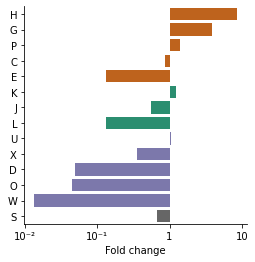

In [30]:
import numpy as np

df = merged_func[merged_func['p_adjusted_fisher']<0.05]
df = df[df['p_adjusted_chi2']<0.05]
df = df[df['fold change']!=0]
df['log(fold change)'] = df["fold change"].apply(np.log10)
corder = ['H','G','P','C','E','K','J','L','U','X','D','O','W','S']
fig, ax = plt.subplots(figsize=(4,4))
#colors=['#d95f02','#d95f02','#d95f02','#d95f02','#d95f02','#80cdc1','#80cdc1','#80cdc1','#dfc27d','#dfc27d','#dfc27d','#dfc27d','#dfc27d','#666666']
colors=['#d95f02','#d95f02','#d95f02','#d95f02','#d95f02','#1b9e77','#1b9e77','#1b9e77','#7570b3','#7570b3','#7570b3','#7570b3','#7570b3','#666666']
sns.barplot(data=df, x='log(fold change)', y="cog",order=corder,palette=sns.color_palette(colors))
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.xticks([-2,-1,0,1],['10⁻²','10⁻¹','1','10'])
ax.set_xlabel('Fold change')
ax.set_ylabel('')

In [31]:
trans = pd.read_csv('./data/figure4/9_arc_motif_cog_count_trans.tsv',sep='\t')
not_trans = pd.read_csv('./data/figure4/9_arc_motif_cog_count_not_trans.tsv',sep='\t')
df = trans.merge(not_trans,on='accession',how = 'outer')
df['arc_trans_all'] = df['arc_trans_all'].fillna(11347)
df['arc_not_trans_all'] = df['arc_not_trans_all'].fillna(191500)
df = df.fillna(0)
df['arc_trans_proportion'] = df['arc_trans_count']/df['arc_trans_all']
df['arc_not_trans_proportion'] = df['arc_not_trans_count']/df['arc_not_trans_all']
df['arc_trans_fold_change'] = df['arc_trans_proportion']/df ['arc_not_trans_proportion']
df
#df.to_csv('./data/figure4/10_arc_cog_count_trans.tsv',sep='\t',index=None)

,accession,arc_trans_count,arc_trans_all,arc_not_trans_count,arc_not_trans_all,arc_trans_proportion,arc_not_trans_proportion,arc_trans_fold_change
0,COG4023,2105.0,11347.0,74.0,191500.0,0.185512,0.000386,480.073909
1,COG2443,1393.0,11347.0,0.0,191500.0,0.122764,0.000000,inf
2,COG4095,1371.0,11347.0,0.0,191500.0,0.120825,0.000000,inf
3,COG0636,749.0,11347.0,0.0,191500.0,0.066009,0.000000,inf
4,COG4068,733.0,11347.0,0.0,191500.0,0.064599,0.000000,inf
...,...,...,...,...,...,...,...,...
445,COG3795,0.0,11347.0,1.0,191500.0,0.000000,0.000005,0.000000
446,COG3784,0.0,11347.0,1.0,191500.0,0.000000,0.000005,0.000000
447,COG0267,0.0,11347.0,1.0,191500.0,0.000000,0.000005,0.000000
448,COG0228,0.0,11347.0,1.0,191500.0,0.000000,0.000005,0.000000


In [7]:
# calculate pvalue
from scipy.stats import fisher_exact
from scipy.stats import chi2_contingency

def cal(infile,outfile):
    out = open(outfile,'wt')
    with open(infile,'rt') as f:
        for line in f:
            if line.startswith('accession'):
                out.write(f'{line.strip()}\tarc_p_fisher\tarc_p_chi2\n')
            else:
                cog,arc_trans_count,arc_trans_all,arc_not_trans_count,arc_not_trans_all,arc_trans_proportion,arc_not_trans_proportion,fold_change = line.strip().split('\t')
                arc_trans_count = float(arc_trans_count)
                arc_not_trans_count = float(arc_not_trans_count)
                arc_trans_no = float(arc_trans_all)-arc_trans_count
                arc_not_trans_no = float(arc_not_trans_all)-arc_not_trans_count
                
                res_fisher = fisher_exact([[arc_trans_count,arc_not_trans_count], [arc_trans_no, arc_not_trans_no]])
                res_chi2 = chi2_contingency([[arc_trans_count,arc_not_trans_count], [arc_trans_no, arc_not_trans_no]])
                out.write(f'{line.strip()}\t{res_fisher.pvalue}\t{res_chi2.pvalue}\n')
    out.close()


infile = './data/figure4/10_arc_cog_count_trans.tsv'
outfile = './data/figure4/11_arc_cog_p_trans.tsv'
cal(infile,outfile)

In [32]:
# p adjust (bonferroni)
from statsmodels.stats.multitest import multipletests
result = pd.read_csv('./data/figure4/11_arc_cog_p_trans.tsv',sep='\t')
rejected, p_adjusted, _, alpha_corrected = multipletests(result['arc_p_fisher'], method='bonferroni')
result['p_adjusted_fisher'] = p_adjusted
rejected, p_adjusted, _, alpha_corrected = multipletests(result['arc_p_chi2'], method='bonferroni')
result['p_adjusted_chi2'] = p_adjusted

cog = pd.read_csv('./data/figure4/cog-20.def.tab.tsv',sep='\t',usecols=[0,1],names=['accession','category'])
merged = result.merge(cog,'left',on='accession')

func = pd.read_csv('./data/figure4/fun-20.tab.txt',usecols=[0,2,3],sep='\t',names=['category','description','process'])
merged_func = merged.merge(func,'left',on='category')
merged_func
#merged_func.to_csv('./data/figure4/12_arc_cog_trans_p_adjust_func.tsv',sep='\t',index=None)

,accession,arc_trans_count,arc_trans_all,arc_not_trans_count,arc_not_trans_all,arc_trans_proportion,arc_not_trans_proportion,arc_trans_fold_change,arc_p_fisher,arc_p_chi2,p_adjusted_fisher,p_adjusted_chi2,category,description,process
0,COG4023,2105.0,11347.0,74.0,191500.0,0.185512,0.000386,480.073909,0.0,0.0,0.0,0.0,U,"Intracellular trafficking, secretion, and vesi...",CELLULAR PROCESSES AND SIGNALING
1,COG2443,1393.0,11347.0,0.0,191500.0,0.122764,0.000000,inf,0.0,0.0,0.0,0.0,U,"Intracellular trafficking, secretion, and vesi...",CELLULAR PROCESSES AND SIGNALING
2,COG4095,1371.0,11347.0,0.0,191500.0,0.120825,0.000000,inf,0.0,0.0,0.0,0.0,G,Carbohydrate transport and metabolism,METABOLISM
3,COG0636,749.0,11347.0,0.0,191500.0,0.066009,0.000000,inf,0.0,0.0,0.0,0.0,C,Energy production and conversion,METABOLISM
4,COG4068,733.0,11347.0,0.0,191500.0,0.064599,0.000000,inf,0.0,0.0,0.0,0.0,R,General function prediction only,POORLY CHARACTERIZED
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
445,COG3795,0.0,11347.0,1.0,191500.0,0.000000,0.000005,0.000000,1.0,1.0,1.0,1.0,Q,"Secondary metabolites biosynthesis, transport ...",METABOLISM
446,COG3784,0.0,11347.0,1.0,191500.0,0.000000,0.000005,0.000000,1.0,1.0,1.0,1.0,S,Function unknown,POORLY CHARACTERIZED
447,COG0267,0.0,11347.0,1.0,191500.0,0.000000,0.000005,0.000000,1.0,1.0,1.0,1.0,J,"Translation, ribosomal structure and biogenesis",INFORMATION STORAGE AND PROCESSING
448,COG0228,0.0,11347.0,1.0,191500.0,0.000000,0.000005,0.000000,1.0,1.0,1.0,1.0,J,"Translation, ribosomal structure and biogenesis",INFORMATION STORAGE AND PROCESSING


In [10]:
# prepare for plot
def add_class(infile,outfile):
    with open(outfile,'wt') as out:
        title = '\t'.join(merged_func.columns.tolist())
        out.write(f'{title}\tclass\n')
        with open(infile,'rt') as f:
            for line in f:
                if line.startswith('accession'):
                    continue
                else:
                    line = line.strip()
                    linelist = line.split('\t')
                    if len(linelist) == 15:
                        if float(linelist[11]) < 0.05:
                            out.write(f'{line}\t{linelist[14]}\n')
                        else:
                            out.write(f'{line}\tNot significant\n')
                            
infile = './data/figure4/12_arc_cog_trans_p_adjust_func.tsv'
outfile = './data/figure4/13_arc_cog_trans_p_adjust_func_plot.tsv'
add_class(infile,outfile)

In [33]:
#plot
df = pd.read_csv('./data/figure4/13_arc_cog_trans_p_adjust_func_plot.tsv',sep='\t')
df['arc_trans_proportion'] = df['arc_trans_proportion']*100
df['arc_not_trans_proportion'] = df['arc_not_trans_proportion']*100
diff = df[df['p_adjusted_chi2']<0.05]
diff = diff[diff['p_adjusted_fisher']<0.05]
diff.to_csv('./data/figure4/14_arc_cog_trans_p_adjust_func_diff.tsv',sep='\t',index=None)
df

,accession,arc_trans_count,arc_trans_all,arc_not_trans_count,arc_not_trans_all,arc_trans_proportion,arc_not_trans_proportion,arc_trans_fold_change,arc_p_fisher,arc_p_chi2,p_adjusted_fisher,p_adjusted_chi2,category,description,process,class
0,COG4023,2105.0,11347.0,74.0,191500.0,18.551159,0.038642,480.073909,0.0,0.0,0.0,0.0,U,"Intracellular trafficking, secretion, and vesi...",CELLULAR PROCESSES AND SIGNALING,CELLULAR PROCESSES AND SIGNALING
1,COG2443,1393.0,11347.0,0.0,191500.0,12.276373,0.000000,inf,0.0,0.0,0.0,0.0,U,"Intracellular trafficking, secretion, and vesi...",CELLULAR PROCESSES AND SIGNALING,CELLULAR PROCESSES AND SIGNALING
2,COG4095,1371.0,11347.0,0.0,191500.0,12.082489,0.000000,inf,0.0,0.0,0.0,0.0,G,Carbohydrate transport and metabolism,METABOLISM,METABOLISM
3,COG0636,749.0,11347.0,0.0,191500.0,6.600864,0.000000,inf,0.0,0.0,0.0,0.0,C,Energy production and conversion,METABOLISM,METABOLISM
4,COG4068,733.0,11347.0,0.0,191500.0,6.459857,0.000000,inf,0.0,0.0,0.0,0.0,R,General function prediction only,POORLY CHARACTERIZED,POORLY CHARACTERIZED
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
422,COG4481,0.0,11347.0,1.0,191500.0,0.000000,0.000522,0.000000,1.0,1.0,1.0,1.0,S,Function unknown,POORLY CHARACTERIZED,Not significant
423,COG3795,0.0,11347.0,1.0,191500.0,0.000000,0.000522,0.000000,1.0,1.0,1.0,1.0,Q,"Secondary metabolites biosynthesis, transport ...",METABOLISM,Not significant
424,COG3784,0.0,11347.0,1.0,191500.0,0.000000,0.000522,0.000000,1.0,1.0,1.0,1.0,S,Function unknown,POORLY CHARACTERIZED,Not significant
425,COG0267,0.0,11347.0,1.0,191500.0,0.000000,0.000522,0.000000,1.0,1.0,1.0,1.0,J,"Translation, ribosomal structure and biogenesis",INFORMATION STORAGE AND PROCESSING,Not significant


Text(34.55980902777779, 0.5, 'Fraction of archaeal transmembrane/secreted smORFs (%)')

<Figure size 432x288 with 0 Axes>

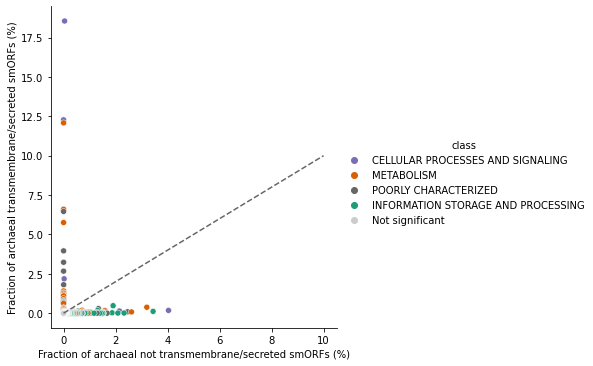

In [34]:
fig = plt.figure()
colors=['#7570b3','#d95f02','#666666','#1b9e77','#CCCCCC']
sns.set_palette(sns.color_palette(colors))
ax = sns.relplot(data=df, x="arc_not_trans_proportion", y="arc_trans_proportion",hue="class")
x=[0,10]
y=[0,10]
plt.plot(x,y, color="#666666", linestyle="--")
plt.xlabel('Fraction of archaeal not transmembrane/secreted smORFs (%)')
plt.ylabel('Fraction of archaeal transmembrane/secreted smORFs (%)')

In [36]:
trans = pd.read_csv('./data/figure4/9_bac_motif_cog_count_trans.tsv',sep='\t')
not_trans = pd.read_csv('./data/figure4/9_bac_motif_cog_count_not_trans.tsv',sep='\t')
df = trans.merge(not_trans,on='accession',how = 'outer')
df['bac_trans_all'] = df['bac_trans_all'].fillna(455582)
df['bac_not_trans_all'] = df['bac_not_trans_all'].fillna(4292445)
df = df.fillna(0)
df['bac_trans_proportion'] = df['bac_trans_count']/df['bac_trans_all']
df['bac_not_trans_proportion'] = df['bac_not_trans_count']/df['bac_not_trans_all']
df['bac_trans_fold_change'] = df['bac_trans_proportion']/df ['bac_not_trans_proportion']
df
#df.to_csv('./data/figure4/10_bac_cog_count_trans.tsv',sep='\t',index=None)

,accession,bac_trans_count,bac_trans_all,bac_not_trans_count,bac_not_trans_all,bac_trans_proportion,bac_not_trans_proportion,bac_trans_fold_change
0,COG3847,68744.0,455582.0,997.0,4292445.0,0.150893,2.322686e-04,6.496476e+02
1,COG2261,47736.0,455582.0,3.0,4292445.0,0.104780,6.989024e-07,1.499212e+05
2,COG0636,26441.0,455582.0,4.0,4292445.0,0.058038,9.318698e-07,6.228107e+04
3,COG1987,24633.0,455582.0,0.0,4292445.0,0.054069,0.000000e+00,inf
4,COG1983,20272.0,455582.0,6.0,4292445.0,0.044497,1.397805e-06,3.183344e+04
...,...,...,...,...,...,...,...,...
938,COG5123,0.0,455582.0,1.0,4292445.0,0.000000,2.329675e-07,0.000000e+00
939,COG1661,0.0,455582.0,1.0,4292445.0,0.000000,2.329675e-07,0.000000e+00
940,COG0691,0.0,455582.0,1.0,4292445.0,0.000000,2.329675e-07,0.000000e+00
941,COG2062,0.0,455582.0,1.0,4292445.0,0.000000,2.329675e-07,0.000000e+00


In [16]:
# calculate pvalue
from scipy.stats import fisher_exact
from scipy.stats import chi2_contingency

def cal(infile,outfile):
    out = open(outfile,'wt')
    with open(infile,'rt') as f:
        for line in f:
            if line.startswith('accession'):
                out.write(f'{line.strip()}\tarc_p_fisher\tarc_p_chi2\n')
            else:
                cog,bac_trans_count,bac_trans_all,bac_not_trans_count,bac_not_trans_all,bac_trans_proportion,bac_not_trans_proportion,fold_change = line.strip().split('\t')
                bac_trans_count = float(bac_trans_count)
                bac_not_trans_count = float(bac_not_trans_count)
                bac_trans_no = float(bac_trans_all)-bac_trans_count
                bac_not_trans_no = float(bac_not_trans_all)-bac_not_trans_count
                
                res_fisher = fisher_exact([[bac_trans_count,bac_not_trans_count], [bac_trans_no, bac_not_trans_no]])
                res_chi2 = chi2_contingency([[bac_trans_count,bac_not_trans_count], [bac_trans_no, bac_not_trans_no]])
                out.write(f'{line.strip()}\t{res_fisher.pvalue}\t{res_chi2.pvalue}\n')
    out.close()


infile ='./data/figure4/10_bac_cog_count_trans.tsv'
outfile = './data/figure4/11_bac_cog_p_trans.tsv'
cal(infile,outfile)

In [37]:
# p adjust (bonferroni)
from statsmodels.stats.multitest import multipletests
result = pd.read_csv('./data/figure4/11_bac_cog_p_trans.tsv',sep='\t')
rejected, p_adjusted, _, alpha_corrected = multipletests(result['arc_p_fisher'], method='bonferroni')
result['p_adjusted_fisher'] = p_adjusted
rejected, p_adjusted, _, alpha_corrected = multipletests(result['arc_p_chi2'], method='bonferroni')
result['p_adjusted_chi2'] = p_adjusted

cog = pd.read_csv('./data/figure4/cog-20.def.tab.tsv',sep='\t',usecols=[0,1],names=['accession','category'])
merged = result.merge(cog,'left',on='accession')

func = pd.read_csv('./data/figure4/fun-20.tab.txt',usecols=[0,2,3],sep='\t',names=['category','description','process'])
merged_func = merged.merge(func,'left',on='category')
merged_func
#merged_func.to_csv('./data/figure4/12_bac_cog_trans_p_adjust_func.tsv',sep='\t',index=None)

,accession,bac_trans_count,bac_trans_all,bac_not_trans_count,bac_not_trans_all,bac_trans_proportion,bac_not_trans_proportion,bac_trans_fold_change,arc_p_fisher,arc_p_chi2,p_adjusted_fisher,p_adjusted_chi2,category,description,process
0,COG3847,68744.0,455582.0,997.0,4292445.0,0.150893,2.322686e-04,6.496476e+02,0.0,0.0,0.0,0.0,UW,NaN,NaN
1,COG2261,47736.0,455582.0,3.0,4292445.0,0.104780,6.989024e-07,1.499212e+05,0.0,0.0,0.0,0.0,R,General function prediction only,POORLY CHARACTERIZED
2,COG0636,26441.0,455582.0,4.0,4292445.0,0.058038,9.318698e-07,6.228107e+04,0.0,0.0,0.0,0.0,C,Energy production and conversion,METABOLISM
3,COG1987,24633.0,455582.0,0.0,4292445.0,0.054069,0.000000e+00,inf,0.0,0.0,0.0,0.0,N,Cell motility,CELLULAR PROCESSES AND SIGNALING
4,COG1983,20272.0,455582.0,6.0,4292445.0,0.044497,1.397805e-06,3.183344e+04,0.0,0.0,0.0,0.0,KT,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
938,COG5123,0.0,455582.0,1.0,4292445.0,0.000000,2.329675e-07,0.000000e+00,1.0,1.0,1.0,1.0,NaN,NaN,NaN
939,COG1661,0.0,455582.0,1.0,4292445.0,0.000000,2.329675e-07,0.000000e+00,1.0,1.0,1.0,1.0,R,General function prediction only,POORLY CHARACTERIZED
940,COG0691,0.0,455582.0,1.0,4292445.0,0.000000,2.329675e-07,0.000000e+00,1.0,1.0,1.0,1.0,O,"Posttranslational modification, protein turnov...",CELLULAR PROCESSES AND SIGNALING
941,COG2062,0.0,455582.0,1.0,4292445.0,0.000000,2.329675e-07,0.000000e+00,1.0,1.0,1.0,1.0,T,Signal transduction mechanisms,CELLULAR PROCESSES AND SIGNALING


In [19]:
# prepare for plot
def add_class(infile,outfile):
    with open(outfile,'wt') as out:
        title = '\t'.join(merged_func.columns.tolist())
        out.write(f'{title}\tclass\n')
        with open(infile,'rt') as f:
            for line in f:
                if line.startswith('accession'):
                    continue
                else:
                    line = line.strip()
                    linelist = line.split('\t')
                    if len(linelist) == 15:
                        if float(linelist[11]) < 0.05:
                            out.write(f'{line}\t{linelist[14]}\n')
                        else:
                            out.write(f'{line}\tNot significant\n')
                            
infile = './data/figure4/12_bac_cog_trans_p_adjust_func.tsv'
outfile = './data/figure4/13_bac_cog_trans_p_adjust_func_plot.tsv'
add_class(infile,outfile)

In [38]:
#plot
df = pd.read_csv('./data/figure4/13_bac_cog_trans_p_adjust_func_plot.tsv',sep='\t')
df['bac_trans_proportion'] = df['bac_trans_proportion']*100
df['bac_not_trans_proportion'] = df['bac_not_trans_proportion']*100
df

,accession,bac_trans_count,bac_trans_all,bac_not_trans_count,bac_not_trans_all,bac_trans_proportion,bac_not_trans_proportion,bac_trans_fold_change,arc_p_fisher,arc_p_chi2,p_adjusted_fisher,p_adjusted_chi2,category,description,process,class
0,COG2261,47736.0,455582.0,3.0,4292445.0,10.478026,0.000070,1.499212e+05,0.0,0.0,0.0,0.0,R,General function prediction only,POORLY CHARACTERIZED,POORLY CHARACTERIZED
1,COG0636,26441.0,455582.0,4.0,4292445.0,5.803785,0.000093,6.228107e+04,0.0,0.0,0.0,0.0,C,Energy production and conversion,METABOLISM,METABOLISM
2,COG1987,24633.0,455582.0,0.0,4292445.0,5.406930,0.000000,inf,0.0,0.0,0.0,0.0,N,Cell motility,CELLULAR PROCESSES AND SIGNALING,CELLULAR PROCESSES AND SIGNALING
3,COG4794,19919.0,455582.0,0.0,4292445.0,4.372210,0.000000,inf,0.0,0.0,0.0,0.0,U,"Intracellular trafficking, secretion, and vesi...",CELLULAR PROCESSES AND SIGNALING,CELLULAR PROCESSES AND SIGNALING
4,COG0690,16813.0,455582.0,16.0,4292445.0,3.690444,0.000373,9.900643e+03,0.0,0.0,0.0,0.0,U,"Intracellular trafficking, secretion, and vesi...",CELLULAR PROCESSES AND SIGNALING,CELLULAR PROCESSES AND SIGNALING
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
884,COG0176,0.0,455582.0,1.0,4292445.0,0.000000,0.000023,0.000000e+00,1.0,1.0,1.0,1.0,G,Carbohydrate transport and metabolism,METABOLISM,Not significant
885,COG1661,0.0,455582.0,1.0,4292445.0,0.000000,0.000023,0.000000e+00,1.0,1.0,1.0,1.0,R,General function prediction only,POORLY CHARACTERIZED,Not significant
886,COG0691,0.0,455582.0,1.0,4292445.0,0.000000,0.000023,0.000000e+00,1.0,1.0,1.0,1.0,O,"Posttranslational modification, protein turnov...",CELLULAR PROCESSES AND SIGNALING,Not significant
887,COG2062,0.0,455582.0,1.0,4292445.0,0.000000,0.000023,0.000000e+00,1.0,1.0,1.0,1.0,T,Signal transduction mechanisms,CELLULAR PROCESSES AND SIGNALING,Not significant


Text(27.90920138888889, 0.5, 'Fraction of bacterial transmembrane/secreted smORFs (%)')

<Figure size 432x288 with 0 Axes>

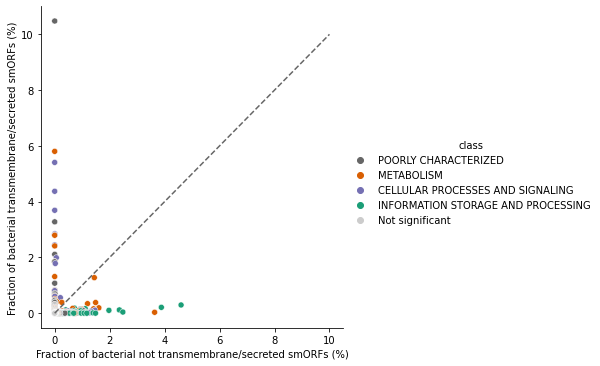

In [39]:
fig = plt.figure()
colors=['#666666','#d95f02','#7570b3','#1b9e77','#CCCCCC']
sns.set_palette(sns.color_palette(colors))
ax = sns.relplot(data=df, x="bac_not_trans_proportion", y="bac_trans_proportion",hue="class")
x=[0,10]
y=[0,10]
plt.plot(x,y, color="#666666", linestyle="--")
plt.xlabel('Fraction of bacterial not transmembrane/secreted smORFs (%)')
plt.ylabel('Fraction of bacterial transmembrane/secreted smORFs (%)')

In [40]:
arc = pd.read_csv('./data/figure4/9_arc_motif_cog_count_trans.tsv',sep='\t')
bac = pd.read_csv('./data/figure4/9_bac_motif_cog_count_trans.tsv',sep='\t')
df = arc.merge(bac,on='accession',how='outer')
df = df.fillna(0)
df['bac_trans_all'] = 455582
df['arc_trans_all'] = 11347
df['arc_trans_proportion'] = df['arc_trans_count']/df['arc_trans_all']
df['bac_trans_proportion'] = df['bac_trans_count']/df['bac_trans_all']
df['fold change'] = df['arc_trans_proportion']/df['bac_trans_proportion']
df
#df.to_csv('./data/figure4/15_arc_bac_motif_cog_count_trans.tsv',sep='\t',index=None)

,accession,arc_trans_count,arc_trans_all,bac_trans_count,bac_trans_all,arc_trans_proportion,bac_trans_proportion,fold change
0,COG4023,2105.0,11347,128.0,455582,0.185512,0.000281,660.279224
1,COG2443,1393.0,11347,153.0,455582,0.122764,0.000336,365.548653
2,COG4095,1371.0,11347,10988.0,455582,0.120825,0.024119,5.009614
3,COG0636,749.0,11347,26441.0,455582,0.066009,0.058038,1.137338
4,COG4068,733.0,11347,55.0,455582,0.064599,0.000121,535.089941
...,...,...,...,...,...,...,...,...
540,COG1846,0.0,11347,1.0,455582,0.000000,0.000002,0.000000
541,COG5433,0.0,11347,1.0,455582,0.000000,0.000002,0.000000
542,COG2910,0.0,11347,1.0,455582,0.000000,0.000002,0.000000
543,COG0736,0.0,11347,1.0,455582,0.000000,0.000002,0.000000


In [24]:
# calculate pvalue
from scipy.stats import fisher_exact
from scipy.stats import chi2_contingency

def cal(infile,outfile):
    out = open(outfile,'wt')
    with open(infile,'rt') as f:
        for line in f:
            if line.startswith('accession'):
                out.write(f'{line.strip()}\tarc_p_fisher\tarc_p_chi2\n')
            else:
                cog,arc_trans_count,arc_trans_all,bac_trans_count,bac_trans_all,arc_trans_proportion,bac_trans_proportion,fold_change = line.strip().split('\t')
                arc_trans_count = float(arc_trans_count)
                bac_trans_count = float(bac_trans_count)
                arc_trans_no = float(arc_trans_all)-arc_trans_count
                bac_trans_no = float(bac_trans_all)-bac_trans_count
                
                res_fisher = fisher_exact([[arc_trans_count,bac_trans_count], [arc_trans_no, bac_trans_no]])
                res_chi2 = chi2_contingency([[arc_trans_count,bac_trans_count], [arc_trans_no, bac_trans_no]])
                out.write(f'{line.strip()}\t{res_fisher.pvalue}\t{res_chi2.pvalue}\n')
    out.close()


infile = './data/figure4/15_arc_bac_motif_cog_count_trans.tsv'
outfile = './data/figure4/16_arc_bac_cog_p_trans.tsv'
cal(infile,outfile)

In [41]:
# p adjust (bonferroni)
from statsmodels.stats.multitest import multipletests
result = pd.read_csv('./data/figure4/16_arc_bac_cog_p_trans.tsv',sep='\t')
rejected, p_adjusted, _, alpha_corrected = multipletests(result['arc_p_fisher'], method='bonferroni')
result['p_adjusted_fisher'] = p_adjusted
rejected, p_adjusted, _, alpha_corrected = multipletests(result['arc_p_chi2'], method='bonferroni')
result['p_adjusted_chi2'] = p_adjusted

cog = pd.read_csv('./data/figure4/cog-20.def.tab.tsv',sep='\t',usecols=[0,1],names=['accession','category'])
merged = result.merge(cog,'left',on='accession')

func = pd.read_csv('./data/figure4/fun-20.tab.txt',usecols=[0,2,3],sep='\t',names=['category','description','process'])
merged_func = merged.merge(func,'left',on='category')
merged_func
#merged_func.to_csv('./data/figure4/17_arc_bac_cog_trans_p_adjust_func.tsv',sep='\t',index=None)

,accession,arc_trans_count,arc_trans_all,bac_trans_count,bac_trans_all,arc_trans_proportion,bac_trans_proportion,fold change,arc_p_fisher,arc_p_chi2,p_adjusted_fisher,p_adjusted_chi2,category,description,process
0,COG4023,2105.0,11347,128.0,455582,0.185512,0.000281,660.279224,0.000000,0.000000,0.000000,0.000000,U,"Intracellular trafficking, secretion, and vesi...",CELLULAR PROCESSES AND SIGNALING
1,COG2443,1393.0,11347,153.0,455582,0.122764,0.000336,365.548653,0.000000,0.000000,0.000000,0.000000,U,"Intracellular trafficking, secretion, and vesi...",CELLULAR PROCESSES AND SIGNALING
2,COG4095,1371.0,11347,10988.0,455582,0.120825,0.024119,5.009614,0.000000,0.000000,0.000000,0.000000,G,Carbohydrate transport and metabolism,METABOLISM
3,COG0636,749.0,11347,26441.0,455582,0.066009,0.058038,1.137338,0.000445,0.000369,0.242487,0.201293,C,Energy production and conversion,METABOLISM
4,COG4068,733.0,11347,55.0,455582,0.064599,0.000121,535.089941,0.000000,0.000000,0.000000,0.000000,R,General function prediction only,POORLY CHARACTERIZED
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,COG1846,0.0,11347,1.0,455582,0.000000,0.000002,0.000000,1.000000,1.000000,1.000000,1.000000,K,Transcription,INFORMATION STORAGE AND PROCESSING
541,COG5433,0.0,11347,1.0,455582,0.000000,0.000002,0.000000,1.000000,1.000000,1.000000,1.000000,X,"Mobilome: prophages, transposons",CELLULAR PROCESSES AND SIGNALING
542,COG2910,0.0,11347,1.0,455582,0.000000,0.000002,0.000000,1.000000,1.000000,1.000000,1.000000,R,General function prediction only,POORLY CHARACTERIZED
543,COG0736,0.0,11347,1.0,455582,0.000000,0.000002,0.000000,1.000000,1.000000,1.000000,1.000000,I,Lipid transport and metabolism,METABOLISM


In [26]:
# prepare for plot
def add_class(infile,outfile):
    with open(outfile,'wt') as out:
        title = '\t'.join(['accession', 'arc_trans_count', 'arc_trans_all', 'bac_trans_count',
                          'bac_trans_all', 'arc_trans_proportion', 'bac_trans_proportion',
                          'fold change', 'arc_p_fisher', 'arc_p_chi2', 'p_adjusted_fisher',
                          'p_adjusted_chi2', 'category', 'description', 'process'])
        out.write(f'{title}\tclass\n')
        with open(infile,'rt') as f:
            for line in f:
                if line.startswith('accession'):
                    continue
                else:
                    line = line.strip()
                    linelist = line.split('\t')
                    if len(linelist) == 15:
                        if float(linelist[11]) < 0.05:
                            out.write(f'{line}\t{linelist[14]}\n')
                        else:
                            out.write(f'{line}\tNot significant\n')
                            
infile = './data/figure4/17_arc_bac_cog_trans_p_adjust_func.tsv'
outfile = './data/figure4/18_arc_bac_cog_trans_p_adjust_func_plot.tsv'
add_class(infile,outfile)

In [42]:
#plot
df = pd.read_csv('./data/figure4/18_arc_bac_cog_trans_p_adjust_func_plot.tsv',sep='\t')
df['arc_trans_proportion'] = df['arc_trans_proportion']*100
df['bac_trans_proportion'] = df['bac_trans_proportion']*100
df

,accession,arc_trans_count,arc_trans_all,bac_trans_count,bac_trans_all,arc_trans_proportion,bac_trans_proportion,fold change,arc_p_fisher,arc_p_chi2,p_adjusted_fisher,p_adjusted_chi2,category,description,process,class
0,COG4023,2105.0,11347,128.0,455582,18.551159,0.028096,660.279224,0.000000,0.000000,0.000000,0.000000,U,"Intracellular trafficking, secretion, and vesi...",CELLULAR PROCESSES AND SIGNALING,CELLULAR PROCESSES AND SIGNALING
1,COG2443,1393.0,11347,153.0,455582,12.276373,0.033583,365.548653,0.000000,0.000000,0.000000,0.000000,U,"Intracellular trafficking, secretion, and vesi...",CELLULAR PROCESSES AND SIGNALING,CELLULAR PROCESSES AND SIGNALING
2,COG4095,1371.0,11347,10988.0,455582,12.082489,2.411860,5.009614,0.000000,0.000000,0.000000,0.000000,G,Carbohydrate transport and metabolism,METABOLISM,METABOLISM
3,COG0636,749.0,11347,26441.0,455582,6.600864,5.803785,1.137338,0.000445,0.000369,0.242487,0.201293,C,Energy production and conversion,METABOLISM,Not significant
4,COG4068,733.0,11347,55.0,455582,6.459857,0.012072,535.089941,0.000000,0.000000,0.000000,0.000000,R,General function prediction only,POORLY CHARACTERIZED,POORLY CHARACTERIZED
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
514,COG1846,0.0,11347,1.0,455582,0.000000,0.000219,0.000000,1.000000,1.000000,1.000000,1.000000,K,Transcription,INFORMATION STORAGE AND PROCESSING,Not significant
515,COG5433,0.0,11347,1.0,455582,0.000000,0.000219,0.000000,1.000000,1.000000,1.000000,1.000000,X,"Mobilome: prophages, transposons",CELLULAR PROCESSES AND SIGNALING,Not significant
516,COG2910,0.0,11347,1.0,455582,0.000000,0.000219,0.000000,1.000000,1.000000,1.000000,1.000000,R,General function prediction only,POORLY CHARACTERIZED,Not significant
517,COG0736,0.0,11347,1.0,455582,0.000000,0.000219,0.000000,1.000000,1.000000,1.000000,1.000000,I,Lipid transport and metabolism,METABOLISM,Not significant


<Figure size 432x288 with 0 Axes>

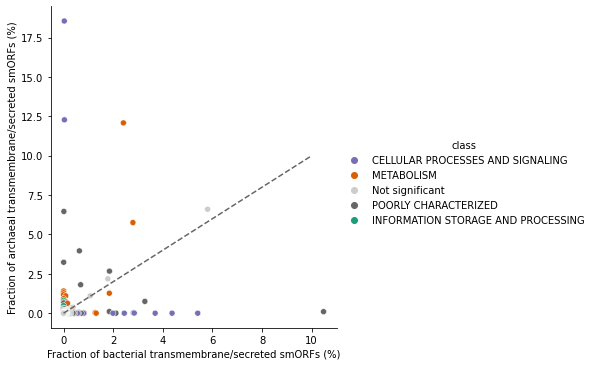

In [44]:
fig = plt.figure()
colors=['#7570b3','#d95f02','#CCCCCC','#666666','#1b9e77']
sns.set_palette(sns.color_palette(colors))
ax = sns.relplot(data=df, x="bac_trans_proportion", y="arc_trans_proportion",hue="class")
x=[0,10]
y=[0,10]
plt.plot(x,y, color="#666666", linestyle="--")
plt.xlabel('Fraction of bacterial transmembrane/secreted smORFs (%)')
plt.ylabel('Fraction of archaeal transmembrane/secreted smORFs (%)')

In [45]:
# arc trans diff with not trans & diff with bac trans
df = pd.read_csv('./data/figure4/18_arc_bac_cog_trans_p_adjust_func_plot.tsv',sep='\t')
df['arc_trans_proportion'] = df['arc_trans_proportion']*100
df['bac_trans_proportion'] = df['bac_trans_proportion']*100
df

,accession,arc_trans_count,arc_trans_all,bac_trans_count,bac_trans_all,arc_trans_proportion,bac_trans_proportion,fold change,arc_p_fisher,arc_p_chi2,p_adjusted_fisher,p_adjusted_chi2,category,description,process,class
0,COG4023,2105.0,11347,128.0,455582,18.551159,0.028096,660.279224,0.000000,0.000000,0.000000,0.000000,U,"Intracellular trafficking, secretion, and vesi...",CELLULAR PROCESSES AND SIGNALING,CELLULAR PROCESSES AND SIGNALING
1,COG2443,1393.0,11347,153.0,455582,12.276373,0.033583,365.548653,0.000000,0.000000,0.000000,0.000000,U,"Intracellular trafficking, secretion, and vesi...",CELLULAR PROCESSES AND SIGNALING,CELLULAR PROCESSES AND SIGNALING
2,COG4095,1371.0,11347,10988.0,455582,12.082489,2.411860,5.009614,0.000000,0.000000,0.000000,0.000000,G,Carbohydrate transport and metabolism,METABOLISM,METABOLISM
3,COG0636,749.0,11347,26441.0,455582,6.600864,5.803785,1.137338,0.000445,0.000369,0.242487,0.201293,C,Energy production and conversion,METABOLISM,Not significant
4,COG4068,733.0,11347,55.0,455582,6.459857,0.012072,535.089941,0.000000,0.000000,0.000000,0.000000,R,General function prediction only,POORLY CHARACTERIZED,POORLY CHARACTERIZED
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
514,COG1846,0.0,11347,1.0,455582,0.000000,0.000219,0.000000,1.000000,1.000000,1.000000,1.000000,K,Transcription,INFORMATION STORAGE AND PROCESSING,Not significant
515,COG5433,0.0,11347,1.0,455582,0.000000,0.000219,0.000000,1.000000,1.000000,1.000000,1.000000,X,"Mobilome: prophages, transposons",CELLULAR PROCESSES AND SIGNALING,Not significant
516,COG2910,0.0,11347,1.0,455582,0.000000,0.000219,0.000000,1.000000,1.000000,1.000000,1.000000,R,General function prediction only,POORLY CHARACTERIZED,Not significant
517,COG0736,0.0,11347,1.0,455582,0.000000,0.000219,0.000000,1.000000,1.000000,1.000000,1.000000,I,Lipid transport and metabolism,METABOLISM,Not significant


In [46]:
arc_diff = pd.read_csv('./data/figure4/14_arc_cog_trans_p_adjust_func_diff.tsv',sep='\t')
arc_diff = arc_diff[-(arc_diff['arc_trans_fold_change']<1)]
len(arc_diff['accession'].to_list())

43

In [47]:
arc_diff = pd.read_csv('./data/figure4/14_arc_cog_trans_p_adjust_func_diff.tsv',sep='\t')
arc_diff = arc_diff[-(arc_diff['arc_trans_fold_change']<1)]
arcdiff = arc_diff['accession'].to_list()
df = df[df['accession'].isin(arcdiff)]
diff = df[df['class']!='Not significant']
#diff.to_csv('./data/figure4/5_arc_bac_cog_trans_p_adjust_func_diff.tsv',sep='\t',index=None)
df

,accession,arc_trans_count,arc_trans_all,bac_trans_count,bac_trans_all,arc_trans_proportion,bac_trans_proportion,fold change,arc_p_fisher,arc_p_chi2,p_adjusted_fisher,p_adjusted_chi2,category,description,process,class
0,COG4023,2105.0,11347,128.0,455582,18.551159,0.028096,660.279224,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,U,"Intracellular trafficking, secretion, and vesi...",CELLULAR PROCESSES AND SIGNALING,CELLULAR PROCESSES AND SIGNALING
1,COG2443,1393.0,11347,153.0,455582,12.276373,0.033583,365.548653,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,U,"Intracellular trafficking, secretion, and vesi...",CELLULAR PROCESSES AND SIGNALING,CELLULAR PROCESSES AND SIGNALING
2,COG4095,1371.0,11347,10988.0,455582,12.082489,2.411860,5.009614,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,G,Carbohydrate transport and metabolism,METABOLISM,METABOLISM
3,COG0636,749.0,11347,26441.0,455582,6.600864,5.803785,1.137338,4.449297e-04,3.693455e-04,2.424867e-01,2.012933e-01,C,Energy production and conversion,METABOLISM,Not significant
4,COG4068,733.0,11347,55.0,455582,6.459857,0.012072,535.089941,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,R,General function prediction only,POORLY CHARACTERIZED,POORLY CHARACTERIZED
5,COG2212,653.0,11347,12733.0,455582,5.754825,2.794887,2.059055,2.184804e-61,1.665206e-77,1.190718e-58,9.075371e-75,P,Inorganic ion transport and metabolism,METABOLISM,METABOLISM
6,COG1563,449.0,11347,2902.0,455582,3.956993,0.636987,6.212043,1.216505e-187,0.000000e+00,6.629953e-185,0.000000e+00,R,General function prediction only,POORLY CHARACTERIZED,POORLY CHARACTERIZED
7,COG2034,367.0,11347,14.0,455582,3.234335,0.003073,1052.503456,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,S,Function unknown,POORLY CHARACTERIZED,POORLY CHARACTERIZED
8,COG3326,303.0,11347,8424.0,455582,2.670309,1.849063,1.444142,1.766853e-09,2.216880e-10,9.629348e-07,1.208199e-07,S,Function unknown,POORLY CHARACTERIZED,POORLY CHARACTERIZED
9,COG1826,248.0,11347,8126.0,455582,2.185600,1.783653,1.225351,2.051606e-03,1.627112e-03,1.000000e+00,8.867759e-01,U,"Intracellular trafficking, secretion, and vesi...",CELLULAR PROCESSES AND SIGNALING,Not significant


<Figure size 432x288 with 0 Axes>

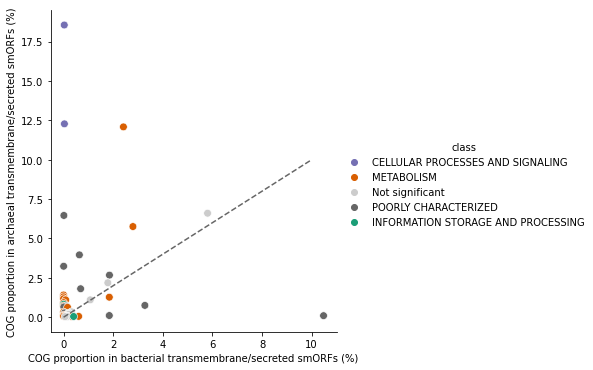

In [49]:
fig = plt.figure()
colors=['#7570b3','#d95f02','#CCCCCC','#666666','#1b9e77']
sns.set_palette(sns.color_palette(colors))
ax = sns.relplot(data=df, x="bac_trans_proportion", y="arc_trans_proportion",hue="class",s=60)
x=[0,10]
y=[0,10]
plt.plot(x,y, color="#666666", linestyle="--")
plt.xlabel('COG proportion in bacterial transmembrane/secreted smORFs (%)')
plt.ylabel('COG proportion in archaeal transmembrane/secreted smORFs (%)')